<a href="https://colab.research.google.com/github/shobhitsundriyal/startml/blob/master/Lunar_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://he-public-data.s3-ap-southeast-1.amazonaws.com/DataSet.zip'

--2019-10-02 12:37:30--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/DataSet.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.36.191
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.36.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733209860 (699M) [application/zip]
Saving to: ‘DataSet.zip’

DataSet.zip         100%[===================>] 699.24M  13.9MB/s    in 53s     

2019-10-02 12:38:30 (13.1 MB/s) - ‘DataSet.zip’ saved [733209860/733209860]



In [2]:
!unzip 'DataSet.zip'

Archive:  DataSet.zip
   creating: DataSet/
 extracting: DataSet/Test Images.zip  
  inflating: DataSet/test.csv        
  inflating: DataSet/train.csv       
 extracting: DataSet/Train Images.zip  


In [3]:
import pandas as pd
train = pd.read_csv('DataSet/train.csv')
train.head()

,Image_File,Class
0,clean2416.png,Large
1,ground4022.png,Small
2,ground0340.png,Small
3,ground2110.png,Small
4,clean1581.png,Large


In [4]:
test = pd.read_csv('DataSet/test.csv')
test.head()

,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [5]:
!unzip 'DataSet/Train Images.zip'

Archive:  DataSet/Train Images.zip
   creating: Train Images/
   creating: Train Images/Large/
  inflating: Train Images/Large/clean2126.png  
  inflating: Train Images/Large/clean5080.png  
  inflating: Train Images/Large/clean5788.png  
  inflating: Train Images/Large/clean4933.png  
  inflating: Train Images/Large/clean4681.png  
  inflating: Train Images/Large/clean5125.png  
  inflating: Train Images/Large/clean2689.png  
  inflating: Train Images/Large/clean2061.png  
  inflating: Train Images/Large/clean2225.png  
  inflating: Train Images/Large/clean3062.png  
  inflating: Train Images/Large/clean0443.png  
  inflating: Train Images/Large/clean1969.png  
  inflating: Train Images/Large/clean0171.png  
  inflating: Train Images/Large/clean4033.png  
  inflating: Train Images/Large/clean1140.png  
  inflating: Train Images/Large/clean1093.png  
  inflating: Train Images/Large/clean3664.png  
  inflating: Train Images/Large/clean5694.png  
  inflating: Train Images/Large/clean4643

In [6]:
!pip install split-folders
!pip install split-folders tqdm

In [7]:
import split_folders
#import split_folders.tqdm
split_folders.ratio('Train Images', output="split", seed=1337, ratio=(.7, .3))

Copying files: 11998 files [00:02, 4134.18 files/s]


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np 
import os, sys

In [0]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(10)

In [0]:
transforms = get_transforms(
    do_flip = True,
    flip_vert = True,
    max_zoom = 0,
    max_rotate = 180, 
    #max_lighting = 0.4,
    #max_warp = 0.2 
)

In [0]:
os.rename('split/val','split/valid')

In [0]:
data = ImageDataBunch.from_folder(path='split', ds_tfms=transforms, size=200)

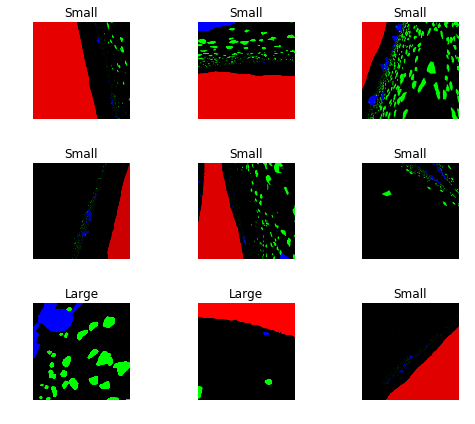

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
print(data.classes)

['Large', 'Small']


In [15]:
kappa = KappaScore()
kappa.weights = "quadratic"
learn = cnn_learner(data, models.resnet50,
                    metrics=[error_rate, kappa])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 85.8MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.33E-04
Min loss divided by 10: 1.06E-02


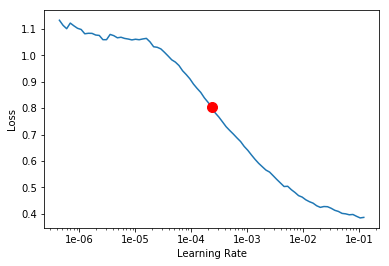

In [16]:
learn.lr_find(end_lr=0.3)
learn.recorder.plot(suggestion=True)

In [18]:
lr = 2.33E-4
learn.fit_one_cycle(15, lr)

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,0.041260,0.014487,0.005000,0.990000,05:02
1,0.042506,0.010763,0.004444,0.991111,04:56
2,0.039206,0.011606,0.004167,0.991667,04:54
3,0.034331,0.010649,0.004722,0.990556,04:54
4,0.031666,0.010732,0.006944,0.986111,04:57
5,0.031481,0.011495,0.006667,0.986667,04:59
6,0.028143,0.004810,0.001667,0.996667,05:03
7,0.020588,0.005108,0.001944,0.996111,05:00
8,0.017681,0.004343,0.001389,0.997222,04:56
9,0.017101,0.004780,0.001389,0.997222,04:55


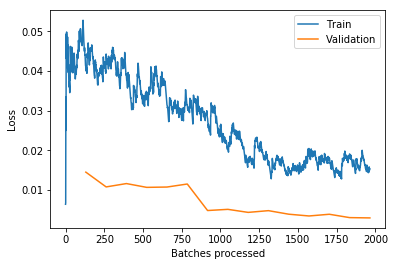

In [19]:
learn.recorder.plot_losses()

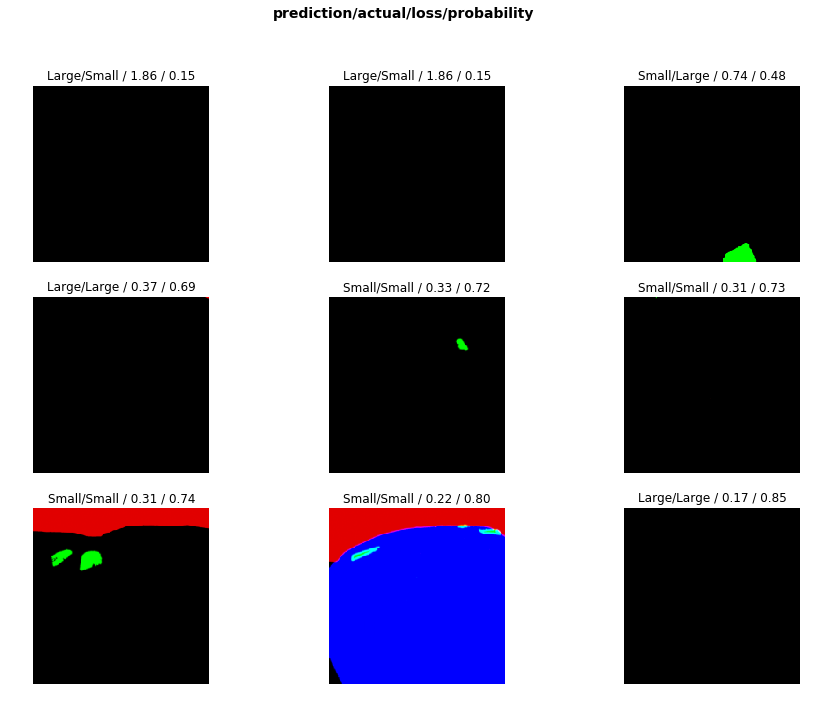

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

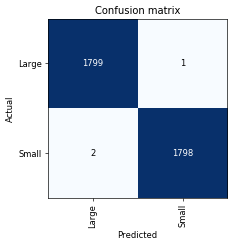

In [21]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [22]:
!unzip 'DataSet/Test Images'

Archive:  DataSet/Test Images.zip
   creating: Test Images/
  inflating: Test Images/lg898 (25).png  
  inflating: Test Images/lg171 (187).png  
  inflating: Test Images/lg898 (204).png  
  inflating: Test Images/lg566 (342).png  
  inflating: Test Images/lgl85 (133).png  
  inflating: Test Images/lgl60 (275).png  
  inflating: Test Images/lg76 (162).png  
  inflating: Test Images/lgl 10 (97).png  
  inflating: Test Images/lgl125 (384).png  
  inflating: Test Images/lgl 10 (22).png  
  inflating: Test Images/lg56 (89).png  
  inflating: Test Images/lgl 10 (117).png  
  inflating: Test Images/lgl85 (303).png  
  inflating: Test Images/lgl125 (242).png  
  inflating: Test Images/lg87 (364).png  
  inflating: Test Images/lgl305 (131).png  
  inflating: Test Images/lgl30 (72).png  
  inflating: Test Images/lgl85 (325).png  
  inflating: Test Images/lg566 (43).png  
  inflating: Test Images/lg99 (205).png  
  inflating: Test Images/lg432 (491).png  
  inflating: Test Images/lg432 (527).png 

In [0]:
learn.data.add_test(ImageList.from_folder(
    'Test Images',
))

In [0]:
preds,y = learn.get_preds(DatasetType.Test)

In [0]:
pre = preds.argmax(1)

In [26]:
pre.shape

torch.Size([7534])

In [27]:
test.shape

(7534, 2)

In [28]:
test.head()

,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [29]:
test.Class = pre
test.head()

,Image_File,Class
0,lg 988 (1).png,1
1,lg 988 (10).png,0
2,lg 988 (100).png,0
3,lg 988 (101).png,1
4,lg 988 (102).png,0


In [0]:
test['Class'] = test['Class'].astype(str)

In [31]:
test['Class'] = test.Class.replace('1','Small')
test['Class'] = test.Class.replace('0','Large')
test.head()

,Image_File,Class
0,lg 988 (1).png,Small
1,lg 988 (10).png,Large
2,lg 988 (100).png,Large
3,lg 988 (101).png,Small
4,lg 988 (102).png,Large


In [0]:
test.to_csv('submit.csv', index=False)